In [48]:
# Import useful dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo.

from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps.

from datetime import datetime

In [49]:
# Import the csv file containing the companies in the S&P500.

companies_df = pd.read_csv("sp500/sp500_companies.csv")
companies_df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,159.59,2675494354944,1.282180e+11,0.112,Cupertino,CA,United States,100000.0,"Apple Inc. designs, manufactures, and markets ...",0.065893
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,294.39,2210274213888,8.574500e+10,0.220,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.054436
2,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2665.61,1820760997888,9.114400e+10,0.324,Mountain View,CA,United States,156500.0,Alphabet Inc. provides online advertising serv...,0.044842
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2673.81,1814979543040,9.114400e+10,0.324,Mountain View,CA,United States,156500.0,Alphabet Inc. provides online advertising serv...,0.044700
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,3062.08,1558121021440,5.917500e+10,0.094,Seattle,WA,United States,1608000.0,"Amazon.com, Inc. engages in the retail sale of...",0.038374


In [50]:
# Examine COVID 19 recession timeframe:

COVID_start = datetime(2020,2,1)
COVID_end = datetime(2020,4,1)

sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["S_P500", "Financials","Consumer_Discretionary","Consumer_Staples","Health","Industrials","Information_Tech","Materials","Real_Estate","Tele_Services","Utilities","Energy"]
thisyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]

# Extract data for each sector from Yahoo Finance and export it to its own CSV file.

for sector in sector_list: 
    file_name=str(sector)+".csv"
    thisyear[sector_list.index(sector)] = globals()[sector] = yf.download(sector, COVID_start, COVID_end)
    thisyear[sector_list.index(sector)].to_csv(f"Output/{file_name}", index=True, header=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [51]:
# Establish paths for CSV import in next step.

Energy = "Output/^GSPE.csv"
Materials = "Output/^SP500-15.csv"
Industrials = "Output/^SP500-20.csv"
Consumer_Disc = "Output/^SP500-25.csv"
Consumer_Stap = "Output/^SP500-30.csv"
Health_Care = "Output/^SP500-35.csv"
Financial = "Output/^SP500-40.csv"
Technology = "Output/^SP500-45.csv"
Communications = "Output/^SP500-50.csv"
Utilities = "Output/^SP500-55.csv"
Real_Estate = "Output/^SP500-60.csv"


In [52]:
# Create a data frame for each sector using its CSV file.

Energy_df = pd.read_csv(Energy)
Materials_df = pd.read_csv(Materials)
Industrials_df = pd.read_csv(Industrials)
Consumer_Disc_df = pd.read_csv(Consumer_Disc)
Consumer_Stap_df = pd.read_csv(Consumer_Stap)
Health_Care_df = pd.read_csv(Health_Care)
Financial_df = pd.read_csv(Financial)
Technology_df = pd.read_csv(Technology)
Communications_df = pd.read_csv(Communications)
Utilities_df = pd.read_csv(Utilities)
Real_Estate_df = pd.read_csv(Real_Estate)


In [53]:
# Rename the column headers to avoid conflicts when merging data frames.

Energy_Cleaned_df=Energy_df.rename(columns={"Open":"Energy Open", "High": "Energy High", "Low": "Energy Low", "Close":"Energy Close", "Adj Close":"Adj Close Energy", "Volume":"Energy Volume"})
Materials_Cleaned_df=Materials_df.rename(columns={"Open":"Materials Open", "High": "Materials High", "Low": "Materials Low", "Close":"Materials Close", "Adj Close":"Adj Close Materials", "Volume":"Materials Volume"})
Industrials_Cleaned_df=Industrials_df.rename(columns={"Open":"Industrials Open", "High": "Industrials High", "Low": "Industrials Low", "Close":"Industrials Close", "Adj Close":"Adj Close Industrials", "Volume":"Industrials Volume"})
Consumer_Disc_Cleaned_df=Consumer_Disc_df.rename(columns={"Open":"Consumer Disc Open", "High": "Consumer Disc High", "Low": "Consumer Disc Low", "Close":"Consumer Disc Close", "Adj Close":"Adj Close Consumer Disc", "Volume":"Consumer Disc Volume"})
Consumer_Stap_Cleaned_df=Consumer_Stap_df.rename(columns={"Open":"Consumer Stap Open", "High": "Consumer Stap High", "Low": "Consumer Stap Low", "Close":"Consumer Stap Close", "Adj Close":"Adj Close Consumer Stap", "Volume":"Consumer Stap Volume"})
Health_Care_Cleaned_df=Health_Care_df.rename(columns={"Open":"Health Care Open", "High": "Health Care High", "Low": "Health Care Low", "Close":"Health Care Close", "Adj Close":"Adj Close Health Care", "Volume":"Health Care Volume"})
Financial_Cleaned_df=Financial_df.rename(columns={"Open":"Financial Open", "High": "Financial High", "Low": "Financial Low", "Close":"Financial Close", "Adj Close":"Adj Close Financial", "Volume":"Financial Volume"})
Technology_Cleaned_df=Technology_df.rename(columns={"Open":"Technology Open", "High": "Technology High", "Low": "Technology Low", "Close":"Technology Close", "Adj Close":"Adj Close Technology", "Volume":"Technology Volume"})
Communications_Cleaned_df=Communications_df.rename(columns={"Open":"Communications Open", "High": "Communications High", "Low": "Communications Low", "Close":"Communications Close", "Adj Close":"Adj Close Communications", "Volume":"Communications Volume"})
Utilities_Cleaned_df=Utilities_df.rename(columns={"Open":"Utilities Open", "High": "Utilities High", "Low": "Utilities Low", "Close":"Utilities Close", "Adj Close":"Adj Close Utilities", "Volume":"Utilities Volume"})
Real_Estate_Cleaned_df=Real_Estate_df.rename(columns={"Open":"Real Estate Open", "High": "Real Estate High", "Low": "Real Estate Low", "Close":"Real Estate Close", "Adj Close":"Adj Close Real Estate", "Volume":"Real Estate Volume"})

In [54]:
# Merge all sector data frames together using the DATE as the merge parameter.

combined1_df = pd.merge(Energy_Cleaned_df, Materials_Cleaned_df, how="left", on=["Date", "Date"])
combined2_df = pd.merge(combined1_df, Industrials_Cleaned_df, how="left", on=["Date", "Date"])
combined3_df = pd.merge(combined2_df, Consumer_Disc_Cleaned_df, how="left", on=["Date", "Date"])
combined4_df = pd.merge(combined3_df, Consumer_Stap_Cleaned_df, how="left", on=["Date", "Date"])
combined5_df = pd.merge(combined4_df, Health_Care_Cleaned_df, how="left", on=["Date", "Date"])
combined6_df = pd.merge(combined5_df, Financial_Cleaned_df, how="left", on=["Date", "Date"])
combined7_df = pd.merge(combined6_df, Technology_Cleaned_df, how="left", on=["Date", "Date"])
combined8_df = pd.merge(combined7_df, Communications_Cleaned_df, how="left", on=["Date", "Date"])
combined9_df = pd.merge(combined8_df, Utilities_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors_df = pd.merge(combined9_df, Real_Estate_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors_df[["Date", "Energy Close", "Materials Close", "Industrials Close", "Consumer Disc Close", "Consumer Stap Close", "Health Care Close", "Financial Close", "Technology Close", "Communications Close", "Utilities Close", "Real Estate Close"]]

,Date,Energy Close,Materials Close,Industrials Close,Consumer Disc Close,Consumer Stap Close,Health Care Close,Financial Close,Technology Close,Communications Close,Utilities Close,Real Estate Close
0,2020-01-31,405.450012,361.989990,684.119995,992.010010,648.250000,1153.959961,497.100006,1673.910034,182.839996,350.079987,243.619995
1,2020-02-03,400.019989,369.720001,683.840027,997.960022,648.190002,1164.640015,500.059998,1695.989990,185.160004,351.220001,243.940002
2,2020-02-04,400.809998,376.170013,696.419983,1015.539978,651.729980,1184.410034,505.250000,1740.060059,186.460007,347.609985,246.839996
3,2020-02-05,415.970001,383.179993,707.989990,1020.570007,656.669983,1207.709961,515.200012,1750.550049,186.550003,349.070007,246.669998
4,2020-02-06,411.640015,382.869995,710.169983,1018.969971,658.840027,1209.050049,514.330017,1766.000000,188.679993,348.980011,247.660004
5,2020-02-07,408.549988,377.269989,705.200012,1016.000000,660.010010,1199.270020,512.489990,1748.739990,188.880005,347.890015,247.779999
6,2020-02-10,405.239990,377.329987,709.169983,1028.760010,662.479980,1205.410034,513.559998,1772.359985,190.460007,349.059998,250.820007
7,2020-02-11,409.470001,379.269989,711.679993,1036.640015,660.090027,1212.829956,515.630005,1766.250000,189.289993,350.390015,253.880005
8,2020-02-12,415.029999,381.260010,718.210022,1046.859985,659.830017,1214.510010,516.010010,1785.010010,191.029999,350.459991,255.580002
9,2020-02-13,413.149994,379.809998,713.219971,1044.329956,663.479980,1207.930054,515.780029,1779.680054,191.309998,354.040009,256.869995


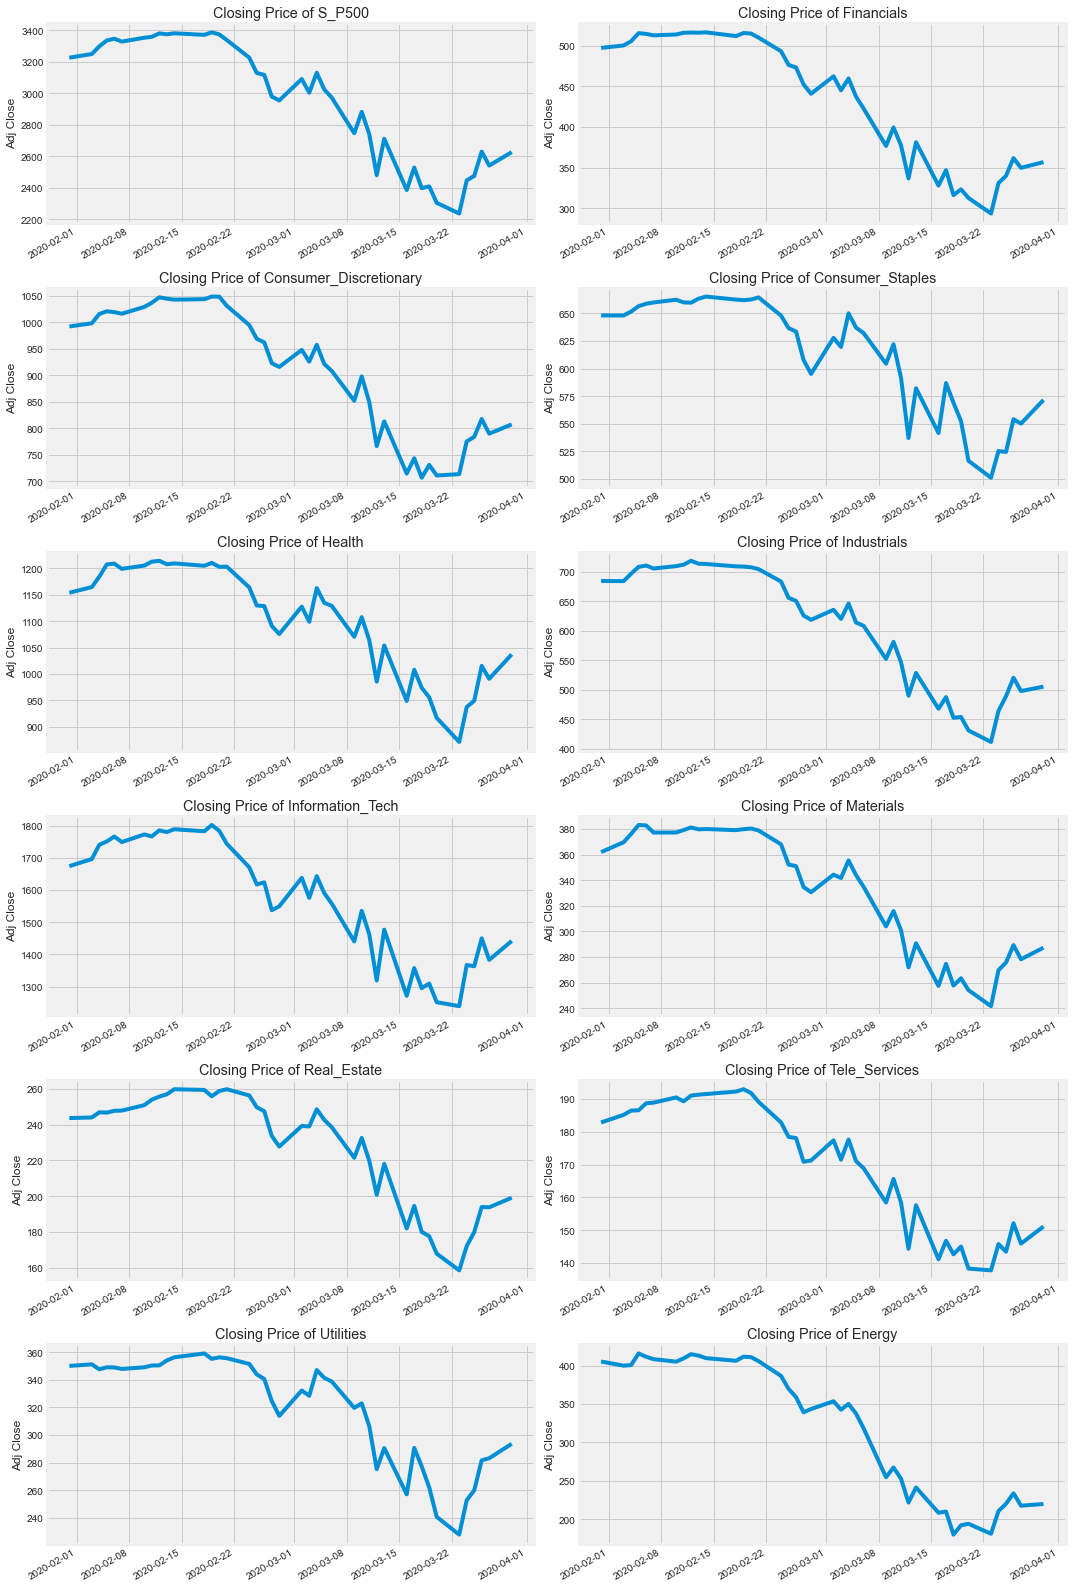

In [55]:
plt.figure(figsize=(15, 40))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, sector in enumerate(sector_list, 1):
    plt.subplot(11, 2, i)
    thisyear[i-1]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {sector_name[i - 1]}")
plt.tight_layout()
plt.savefig(f"Adj Close Change by Sectors({COVID_start.year}).png")  